# Análise resultados BPZ para amostra VALID DES 

A ideia principal será analisar os resultados obtidos com o algoritmo BPZ (Bayesian Photometric Redshifts) após o cálculo fotométrico do redshift utilizando a amostra valid. A amostra consta com dados de observações de aproximadamente 5800 galáxias.

A pesquisa foi separada em três etapas:

1. Primeira execução: entendendo o aloritmo para obter experiencia com os parâmetros _default_ (magnitudes MAGAUTO)
2. Segunda execução: rodando o algoritmo com filtros e parâmetros corrigidos (magnitudes MAGAUTO)
3. Terceira execução: algoritmo executado com filtros ajustados e magnitude correta (magnitude MAGDETMODEL)
    * 3.1 sem banda u
    * 3.2 com banda u

Importante ressaltar que a **MAGDETMODEL** é calculada a partir do formato da galáxia que melhor se encaixa em um filtro que se chama SEXtractor para depois ser medido o fluxo para cada banda de acordo com o formato que se encaixa melhor. Enquanto a **MAGAUTO** é calculada apartir do fluxo da abertura elíptica dando a estimativa total da magnitude do objeto.

---

# 0 - Setup 
Importando as principais bibliotecas utilizadas

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Pimeira execução.

A primeira execução foi feita rodando o algoritmo com os valores padrão indicados pelo autor do código e em cima da MAGAUTO e seus respectivos valores de erro presentes na amostra.

### 1.1 - lendo o arquivo com os resultados do bpz 

In [103]:
headers_bpz = ["id", "zb", "zbmin", "zbmax", "tb", "odds", "zml", "tml", "chisq", "zspec", "M0", "other", "chisq2", "nfdet", "nfobs"]

bpz_default_settings_magauto_df = pd.read_csv("main_valid_bpz.cat", delim_whitespace=True, names=headers_bpz)
bpz_default_settings_magauto_df.head()

id    zb  zbmin  zbmax   tb    odds   zml    tml   chisq  zspec      M0  \
0   598  0.20  0.082  0.318  1.0  1.0000  0.20  1.000   7.270  0.246  18.105   
1   838  0.43  0.290  0.570  1.0  1.0000  3.62  1.667   1.353  0.441  18.776   
2   941  0.10  0.000  0.208  1.0  1.0000  0.10  1.000  16.107  0.125  17.466   
3  1000  0.40  0.040  0.860  0.0  0.4655  3.90  2.333   0.090  0.516  19.964   
4  2883  0.01  0.000  0.109  2.0  1.0000  0.01  2.000  10.375  0.112  17.609   

   other     chisq2  nfdet  nfobs  
0     17     0.2091      5      5  
1     17     0.0722      5      5  
2     17     0.4516      5      5  
3     17  4974.7587      4      5  
4     17     0.1901      5      5

---
## Definindo a funções auxiliares

Essas funções vão facilitar na hora de plotar outros resultados para cada tentativa.

## Bias e Scatter

Aqui declaramos uma função para auxiliar para criar um plot que do resultado de redshift da spectroscopia vs o resultado obtido para fotometria pelo algoritmo.

A plotagem do gráfico de zspec e zb (z best) é importante, pois consegue-se observar, pela distribuição dos pontos, o bias e scatter do algoritmo com a amostra.

Sendo o _bias_ um viés, que indica uma tendencia de desvio da linha vermelha, que no caso indica um cenário perfeito, onde o resultado do algoritmo para photoz é igual ao specz. E o _scatter_ sendo a dispersão da nuvem de pontos.

In [113]:
plt.style.use('seaborn-dark-palette')

def plot_photoz_zspec(df):
    plt.plot(df["zspec"], df["zb"], f".", color="midnightblue", alpha=0.5)
    plt.plot([0, 2], [0, 2], 'r-')

    plt.ylabel("photo-z", fontsize=18)
    plt.xlabel("zspec", fontsize=18)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.xlim(0, 1.5)
    plt.ylim(0, 1.5)

---
### 1.2 - Analisando o resultado

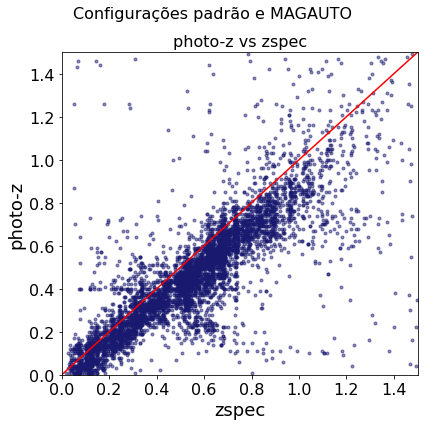

In [161]:
plt.figure(figsize=[6,6])

plt.title("photo-z vs zspec", fontsize=16)
plt.suptitle("Configurações padrão e MAGAUTO", fontsize=16)

plot_photoz_zspec(bpz_default_settings_magauto_df)

plt.tight_layout()

> ### Observações:
> Aqui podemos ver como a nuvem de pontos fica deslocada para baixo da linha vermelha, pode-se então dizer que existe um BIAS negativo para essa amostra com as configurações _default_ do algoritmo. 

-----
## Distribuição do zspec e photoz

Aqui faremos uma função para ajudar a visualizar a distribuição dos resultados zspec em comparação ao photoz.

**Weight** - a pesagem é uma técnica que associa um peso para cada galáxia. Esse peso serve pra que quando se observar a distribuição da fotometria se chegue mais perto do exemplo real.

In [174]:
def hist_photoz_zspec(df):
    plt.hist(df["zb"], np.arange(0,2,0.04), histtype="step", density=True, color="r", lw=2, label="photo-z")
    plt.hist(df["zspec"], np.arange(0,2,0.04), density=True, label="zspec", color="steelblue")

    plt.xlabel("redshift", fontsize=16)
    plt.ylabel("counts", fontsize=16)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend()

    plt.xlim(0, 1.4)

weight_df = np.loadtxt("../../Amostras/des_sv_main_standard_weights", delimiter=" ", usecols=[2])
    
def hist_photoz_zspec_weighted(df):
    plt.hist(df["zb"], np.arange(0,2,0.04), histtype="step", density=True, color="r", lw=2, label="photo-z", weights=weight_df)
    plt.hist(df["zspec"], np.arange(0,2,0.04), density=True, label="zspec", color="steelblue", weights=weight_df)

    plt.xlabel("redshift", fontsize=16)
    plt.ylabel("counts", fontsize=16)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend()

    plt.xlim(0, 1.4)

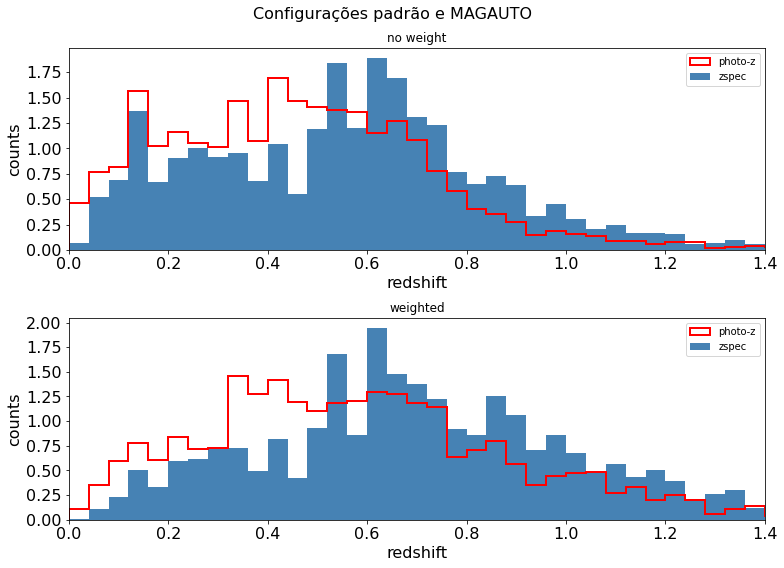

In [175]:
plt.figure(figsize=[11,8])
plt.suptitle("Configurações padrão e MAGAUTO", fontsize=16)

plt.subplot(2,1,1).set_title("no weight")
hist_photoz_zspec(bpz_default_settings_magauto_df)

plt.subplot(2,1,2).set_title("weighted")
hist_photoz_zspec_weighted(bpz_default_settings_magauto_df)

plt.tight_layout()

>### Observação: 
>Nesses dois gráficos podemos comparar como o a técnica de pesagem impacta nos  gráficos, trazendo essa suavização nos pilares dos gráficos. Outro ponto bom de se observar é a comparação com o resultado do zspec e photoz, deixando claro a diferença nos resultados obtidos.

### 1.3 - Conclusão chegada

As configurações padrões que vem no algoritmo não são as mais indicadas para a amostra. Trazendo um bias mais abaixo do que encontrado nos resultados do artigo. 

O próximo passo será corrigir essas configurações.

___

# 2. Segunda execução.

<font color='red'>TODO DUVIDAS</font>

A segunda execução foi feita rodando o algoritmo ainda com a MAGAUTO porém as seguintes alterações foram feitas no algoritmo:

1. PRIOR: cálculo que diz qual o tipo de galáxia e compara o valor com uma tabela pré definida?
    * de hdfn_gen para cosmos_Laigle 
2. ZMAX: estabelece um limite máximo de valor a se obter para pz
    * de 10 para 2
3. DZ: a resolução do redshift
    * de 0.05 para 0.01
4. INTERP: numero de interpolação que o algoritmo fará para cada template
    * de 0 para 2
5. FILTROS: ver aqui tmb
    * do SDSS para ### **(ver com julia o nome do filtro q usamos)**

### 2.1 - lendo o arquivo com os resultados do bpz 

In [156]:
bpz_magauto_df = pd.read_csv("main_valid_magauto_bpz.cat", delim_whitespace=True, names=headers_bpz)
bpz_magauto_df.head()

id    zb  zbmin  zbmax     tb    odds   zml    tml   chisq  zspec  \
0   598  0.30  0.173  0.427  1.333  1.0000  0.30  1.333  17.454  0.246   
1   838  0.48  0.335  0.625  1.000  1.0000  4.08  1.333   2.004  0.441   
2   941  0.14  0.028  0.252  1.000  1.0000  0.14  1.000  55.073  0.125   
3  1000  0.35  0.080  0.780  0.000  0.5642  4.02  1.667   2.219  0.516   
4  2883  0.07  0.000  0.175  2.000  1.0000  0.07  2.000  23.766  0.112   

       M0  other     chisq2  nfdet  nfobs  
0  17.669     17     0.1815      6      6  
1  18.112     17     0.1547      6      6  
2  17.093     17     0.8028      6      6  
3  19.242     17  3806.0204      5      6  
4  17.285     17     0.2941      6      6

### 2.2 - Analisando o resultado

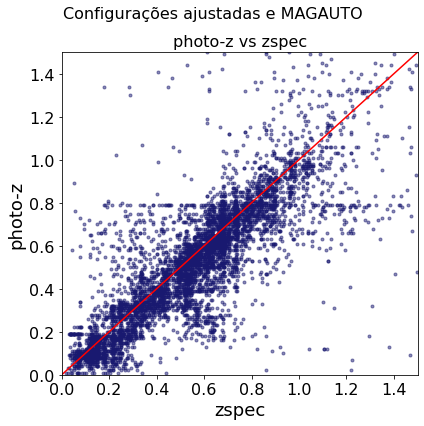

In [165]:
plt.figure(figsize=[6,6])
plt.title("photo-z vs zspec", fontsize=16)
plt.suptitle("Configurações ajustadas e MAGAUTO", fontsize=16)

plot_photoz_zspec(bpz_magauto_df)

plt.tight_layout()

>### Observação: 
>Nessa segunda tentativa, podemos perceber uma melhora significatva em relação ao bias no resultado, ainda podemos ver que existe um scatter mais espalhado em relação ao primeiro resultado.

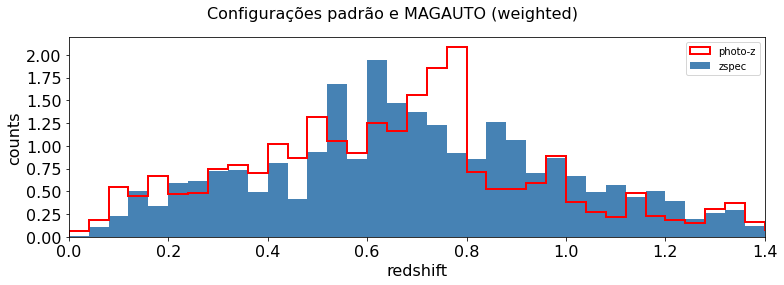

In [173]:
plt.figure(figsize=[11,4])
plt.suptitle("Configurações padrão e MAGAUTO (weighted)", fontsize=16)

hist_photoz_zspec_weighted(bpz_magauto_df)

plt.tight_layout()

>### Observação: 
>Já se nota, comparando com o primeiro resultado obtido, uma melhora em relação ao photoz em comparação ao zspec.

### 2.3 - Conclusão chegada

As configurações ajustadas melhoraram significativamente os resultados que tivemos porém, ainda executamos calculando em cima da MAGAUTO, como o BPZ faz o cálculo do redshift em cima do tipo de galáxias, é mais interessante ser usado a MAGDETMODEL pois o cálculo das magnitudes variam de acordo com cada tipo de galáxia, assim, na hora de decidir o melhor redshift tem se um resultado mais fiel para os algoritmos de template-fitting.
___

### CURIOSIDADE - Analisando pz por magnitude

A ideia é olhar como se comportam os resultados dos redshifts em relação a magnitude na banda principal escolhida banda_i. Para facilitar, vamos ler a amostra antes de rodar o algoritmo (contém os valores das magnitudes) e juntar com os resultados obtidos com o algoritmo.

In [179]:
headers=[
    "u_auto", "u_auto_err", "u_det", "u_det_err",
    "g_auto", "g_auto_err", "g_det", "g_det_err", 
    "r_auto", "r_auto_err", "r_det", "r_det_err", 
    "i_auto", "i_auto_err", "i_det", "i_det_err", 
    "z_auto", "z_auto_err", "z_det", "z_det_err", 
    "Y_auto", "Y_auto_err", "Y_det", "Y_det_err", 
    "z", "ra", "dec", "z_flags", "field_id", "number"
]

original_df = pd.read_csv("../../Amostras/des_sv_main_standard.valid", delimiter=" ", names=headers)

merged_magauto_df = pd.merge(original_df, bpz_magauto_df, left_on=['number', 'field_id'], right_on=['id', 'other'], how='outer')
merged_magauto_df.head()

u_auto  u_auto_err      u_det  u_det_err     g_auto  g_auto_err  \
0   21.289967    0.093643  21.219734   0.054884  19.387075    0.005967   
1   22.749687    0.423850  22.873457   0.257264  20.505518    0.022398   
2   20.138296    0.032109  19.973942   0.016162  18.394489    0.003026   
3  102.300003   99.000000  24.871027   2.332464  21.658445    0.048645   
4   19.335194    0.018206  19.416962   0.012183  18.125895    0.002492   

       g_det  g_det_err     r_auto  r_auto_err  ...    odds   zml    tml  \
0  19.260431   0.003744  18.104645    0.002704  ...  1.0000  0.30  1.333   
1  20.463280   0.011917  18.776411    0.007223  ...  1.0000  4.08  1.333   
2  18.232428   0.002069  17.466225    0.001982  ...  1.0000  0.14  1.000   
3  21.113125   0.027328  19.963562    0.015980  ...  0.5642  4.02  1.667   
4  18.098228   0.001835  17.608807    0.002138  ...  1.0000  0.07  2.000   

    chisq  zspec      M0  other     chisq2  nfdet  nfobs  
0  17.454  0.246  17.669     17     0.1815      6      6  
1   2.004  0.441  18.112     17     0.1547      6      6  
2  55.073  0.125  17.093     17     0.8028      6      6  
3   2.219  0.516  19.242     17  3806.0204      5      6  
4  23.766  0.112  17.285     17     0.2941      6      6  

[5 rows x 45 columns]

definindo uma função para auxiliar a visualização da magnitude banda i vs pz

In [186]:
def plot_magi_pz(df):
    plt.plot(df["zb"], df["i_auto"], ".", color="midnightblue", alpha=0.1)

    plt.ylabel("mag (i)", fontsize=18)
    plt.xlabel("zb", fontsize=18)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.xlim(0, 2)
    plt.ylim(12, 25)

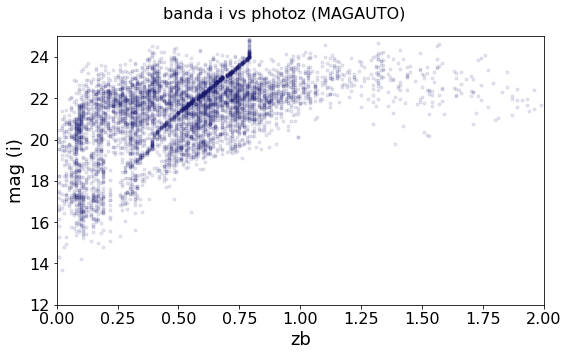

In [188]:
plt.figure(figsize=[8,5])
plt.suptitle("banda i vs photoz (MAGAUTO)", fontsize=16)

plot_magi_pz(merged_magauto_df)

plt.tight_layout()

Se observa uma característica que chama bastante atenção e vale a pena dar uma olhada mais próxima a titulo de curiosidade. 
O bpz possui um output que dá a porcentagem do resultado estar correto, com isso vale a pena dar uma olhadinha nesse comportamento com base na magnitude.

**ODDS**: a probabilidade do resultado estar correto, valores baixos significam que há mais de um resultado.


In [199]:
def plot_filtro_odds(filtro = "zb > 0", odds = ""):
    plt.plot(merged_magauto_df.query(filtro)["zb"], merged_magauto_df.query(filtro)["i_auto"], ".", color="midnightblue", alpha=0.1)

    plt.ylabel("mag (i)", fontsize=18)
    plt.xlabel(f"zb {odds} odds ", fontsize=18)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.xlim(0.25, 0.8)
    plt.ylim(18, 25)

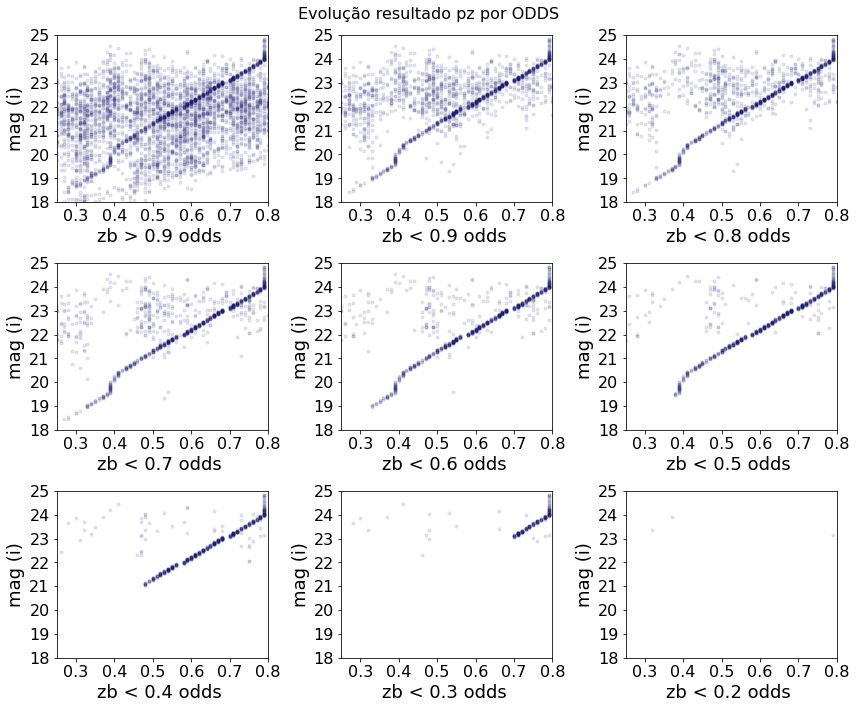

In [200]:
plt.figure(figsize=[12,10])
plt.suptitle("Evolução resultado pz por ODDS", fontsize=16)

plt.subplot(3,3,1)
plot_filtro_odds(odds = "> 0.9")

for i in [2, 3, 4, 5, 6, 7, 8, 9]:
    plt.subplot(3,3,i)
    plot_filtro_odds(f"odds <= 0.{11-i}", f"< 0.{11-i}")

plt.tight_layout()

> Conforme esperado, quanto maior a magnitude maior a imprecisão do resultado de redshift fotométrico.

### Bokeh

Bokeh é uma lib que ajuda a montar gráficos interativos. Aqui vai facilitar na coleta de pontos para serem vistos no target viewer.

Nesse caso nos interessa apenas a "cobrinha" formada, então vamos limitar os pontos para plotar dentro do gráfico interativo.

In [204]:
df = merged_magauto_df.query("zb > 0.25 & zb < 0.8 & i_auto < 25 & i_auto > 18.5")

In [331]:
# Bokeh libs
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, NumeralTickFormatter, Button
from bokeh.layouts import column

#define que a saida será via notebook
output_notebook()

#função que monta o gráfico
def grafico(doc):

    #define as tools que serão usadas
    select_tools = ['lasso_select', 'reset']

    #cria uma figura 
    fig = figure(title="plot (mag x redshift) interativo de galáxias ", 
                 x_axis_label='zb', 
                 y_axis_label='i_auto', 
                 tools=select_tools)

    #transfroma o dataframe em ColumnDataSource, para podermos localizar os pontos que serão selecionados
    cds = ColumnDataSource(df)
    
    #definindo o tipo de gráfico dentro da figura
    fig.circle(x="zb", y='i_auto', source=cds, line_width=0.5)
    
    #função que vai executar quando tiver uma interação no botão 
    def salvar_pontos():
        indices=cds.selected.indices
        results=df.iloc[indices]
        d = {'ra': results['ra'], 'dec': results['dec']}
        ndf = pd.DataFrame(data=d)
        
        file_name = "magauto_selected_output.csv"
        ndf.to_csv(file_name, sep=';', header=False)

    #criando o botão que vai salvar o resultado em csv
    btn = Button(label='Salvar pontos em csv', button_type='success')
    btn.on_click(salvar_pontos)

    #adicionando o botão e a figura no nosso documento (celula)
    doc.add_root(column(btn,fig))

#renderiza o documento (celula) com o que foi definido dentro do callback
show(grafico)

Loading BokehJS ...

### Target Viewer
Aqui consta algumas fotos analisadas no target viewer para vermos melhor alguns desses pontos.

<font color='red'>TODO AJUSTAR ISSO tá estranho</font>

In [318]:
import matplotlib.image as mpimg
from glob import glob

#lê todas as imagens da pasta
images = glob("./mag_det_08/*.png")

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=[8,8], dpi=500)
fig.set_figwidth(40)
fig.set_figheight(40)

for img, ax in zip(images, axes.ravel()):   
    img1 = mpimg.imread(img)
    ax.imshow(img1)    
    ax.axis('off')
    
plt.subplots_adjust(wspace=.001, hspace = .01)

___
# 3. Terceira execução.

A terceira execução foi feita utilizando a MAGDETMODEL, a ideia é comparar o resultado rodando em cima da amostra com banda u e sem a banda u. A banda u é importante para desempate de tipo de galáxia, e portanto traz uma maior precisão em valores baixos no cálculo do pz

### 3.1 - lendo o arquivo com os resultados do bpz 

In [332]:
bpz_magdetmodel_df = pd.read_csv("main_valid_magdet_bpz.cat", delim_whitespace=True, names=headers_bpz, skiprows=17)
bpz_sem_u_band_df = pd.read_csv("main_valid_magdet_bpz_withou_u_band.cat", delim_whitespace=True, names=headers_bpz, skiprows=17)

### 3.2 - Resultados

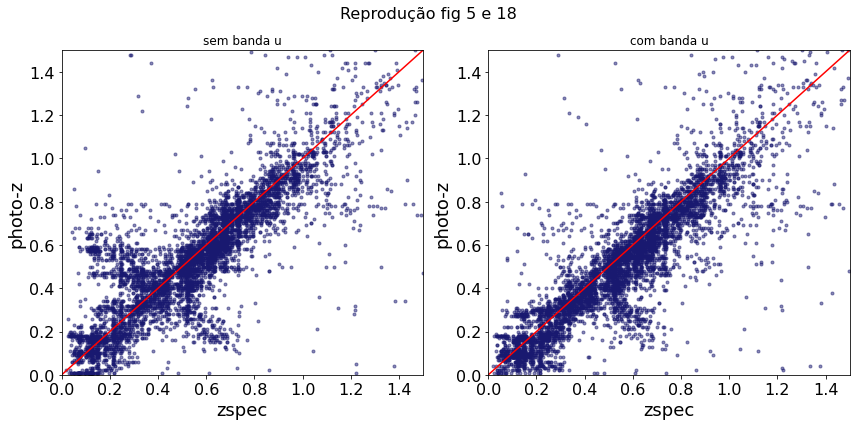

In [333]:
plt.figure(figsize=[12,6])

plt.suptitle("Reprodução fig 5 e 18", fontsize=16)

plt.subplot(1,2,1).set_title("sem banda u")
plot_photoz_zspec(bpz_sem_u_band_df)


plt.subplot(1,2,2).set_title("com banda u")
plot_photoz_zspec(bpz_magdetmodel_df)

plt.tight_layout()

>### Observação: 
>Como podemos observar, houve a reprodução muito parecida com a do artigo, podendo notar como a primeira figura se assemelha ao formato de uma espada, sendo por conta da imprecisão do algoritmo ao decidir o melhor tipo espectral da galáxia. Já no segundo vemos que uma bainha desaparece, justamente por conter a banda u para desempatar possiveis galáxias encaixadas no algoritmo.

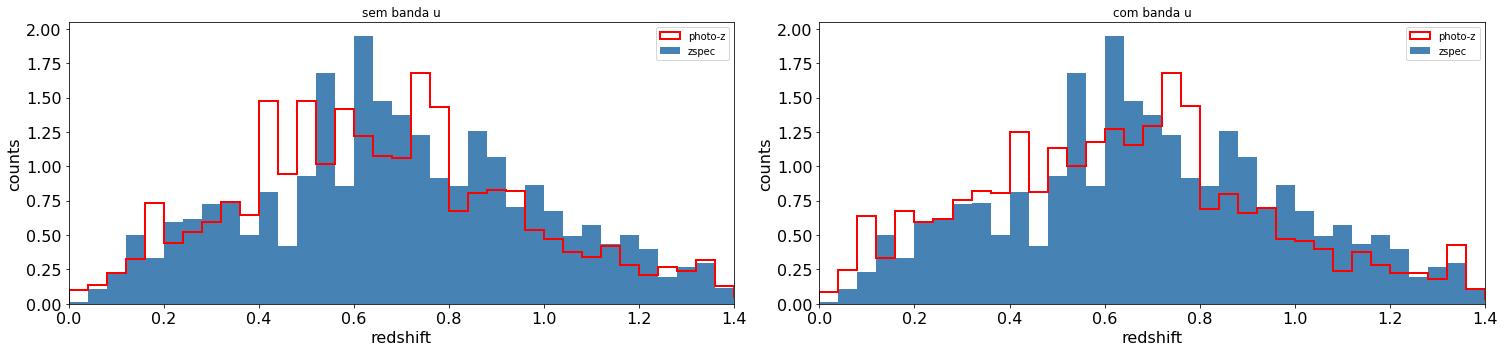

In [329]:
plt.figure(figsize=[21,5])

plt.subplot(1,2,1).set_title("sem banda u")
hist_photoz_zspec_weighted(bpz_sem_u_band_df)

plt.subplot(1,2,2).set_title("com banda u")
hist_photoz_zspec_weighted(bpz_magdetmodel_df)

plt.tight_layout()

>### Observação: 
>A intenção aqui é perceber o impacto no resultado obtido em com e sem banda u em comparação do photoz calculado para o zspec já definido na amostra.

## Métricas